# Credit Card Fraud Detection

## Import Libraries and Data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

np.random.seed(0)

In [3]:
tf.__version__

'2.5.0'

In [4]:
dataset = pd.read_csv('creditcard.csv')

In [5]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Preprocessing 

In [6]:
# Scale features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

dataset['Normalized_ammount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset = dataset.drop(columns = ['Amount','Time'])

In [7]:
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_ammount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [8]:
X = dataset.drop('Class',axis=1)
y = dataset['Class']

## Splitting Data 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
X_train.shape

(199364, 29)

In [11]:
X_test.shape

(85443, 29)

In [12]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


## Build and Train ANN 

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [14]:
ann = Sequential([
    Dense(units = 16,input_dim = 29,activation = 'relu'),
    Dense(units = 24,activation = 'relu'),
    Dropout(0.5),
    Dense(units = 20,activation = 'relu'),
    Dense(units = 24,activation = 'relu'),
    Dense(1,activation = 'sigmoid'),
])

In [15]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [16]:
ann.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train,y_train, batch_size=15,epochs=5)

Epoch 1/5
13291/13291 [==============================] - 18s 1ms/step - loss: 0.0083 - accuracy: 0.9986
Epoch 2/5
13291/13291 [==============================] - 24s 2ms/step - loss: 0.0042 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 24s 2ms/step - loss: 0.0038 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 24s 2ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 5/5
13291/13291 [==============================] - 22s 2ms/step - loss: 0.0039 - accuracy: 0.9994


## Predictions and Evaluation 

In [17]:
score = ann.evaluate(X_test,y_test)

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0028 - accuracy: 0.9994


In [18]:
print(score)

[0.0028290969785302877, 0.9994031190872192]


In [19]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = ann.predict(X_test)
y_test = pd.DataFrame(y_test)

print(confusion_matrix(predictions.round(), y_test))
print('\n')
print(classification_report(predictions.round(), y_test))

[[85281    25]
 [   26   111]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85306
         1.0       0.82      0.81      0.81       137

    accuracy                           1.00     85443
   macro avg       0.91      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



Confusion matrix, without normalization
[[85281    25]
 [   26   111]]


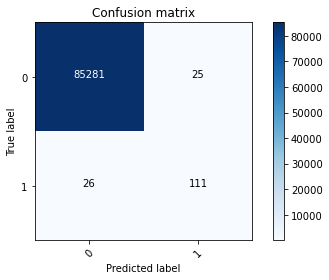

In [21]:
plot_confusion_matrix(confusion_matrix(predictions.round(), y_test),
                     classes=[0,1])

In [22]:
# Plot confusion matrix for entire dataset

predictions = ann.predict(X)
y_expected = pd.DataFrame(y)

print(confusion_matrix(predictions.round(), y_expected))
print('\n')
print(classification_report(predictions.round(), y_expected))

[[284246    104]
 [    69    388]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    284350
         1.0       0.79      0.85      0.82       457

    accuracy                           1.00    284807
   macro avg       0.89      0.92      0.91    284807
weighted avg       1.00      1.00      1.00    284807



Confusion matrix, without normalization
[[284246    104]
 [    69    388]]


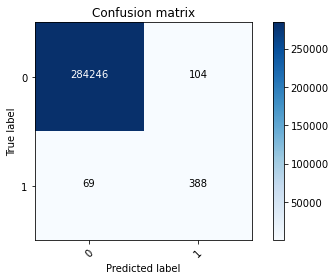

In [23]:
plot_confusion_matrix(confusion_matrix(predictions.round(), y_expected),
                     classes=[0,1])

## Random Forest 

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
predictions = classifier.predict(X_test)

In [26]:
classifier.score(X_test,y_test)

0.9996254813150287

In [27]:
predictions = classifier.predict(X_test)
y_test = pd.DataFrame(y_test)

print(confusion_matrix(predictions.round(), y_test))
print('\n')
print(classification_report(predictions.round(), y_test))

[[85301    26]
 [    6   110]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85327
           1       0.81      0.95      0.87       116

    accuracy                           1.00     85443
   macro avg       0.90      0.97      0.94     85443
weighted avg       1.00      1.00      1.00     85443



Confusion matrix, without normalization
[[85301    26]
 [    6   110]]


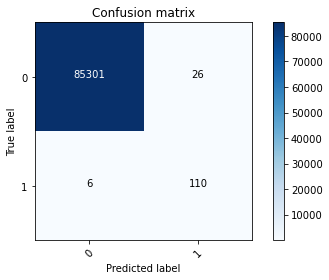

In [28]:
plot_confusion_matrix(confusion_matrix(predictions.round(), y_test),
                     classes=[0,1])

## Decision Trees 

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
predictions = classifier.predict(X_test)
y_test = pd.DataFrame(y_test)

print(confusion_matrix(predictions.round(), y_test))
print('\n')
print(classification_report(predictions.round(), y_test))

[[85269    28]
 [   38   108]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85297
           1       0.79      0.74      0.77       146

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443



Confusion matrix, without normalization
[[85269    28]
 [   38   108]]


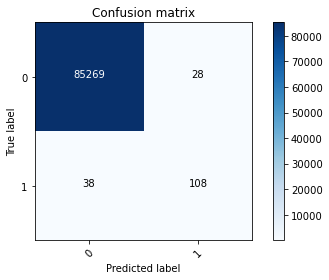

In [31]:
plot_confusion_matrix(confusion_matrix(predictions.round(), y_test),
                     classes=[0,1])

## Undersampling 

In [32]:
fraud_indices = np.array(dataset[dataset['Class']==1].index)
number_reconds_fraud = len(fraud_indices)
print(number_reconds_fraud)

492


In [33]:
non_fraud_indices = np.array(dataset[dataset['Class']==0].index)
number_reconds_nonfraud = len(non_fraud_indices)
print(number_reconds_nonfraud)

284315


In [34]:
random_nonfraud_indices = np.random.choice(non_fraud_indices,number_reconds_fraud,replace=False)
random_nonfraud_indices = np.array(random_nonfraud_indices)

In [35]:
print(len(random_nonfraud_indices))

492


In [38]:
under_sample_indices = np.concatenate([fraud_indices,random_nonfraud_indices])
print(len(under_sample_indices))

984


In [39]:
under_sample_data = dataset.iloc[under_sample_indices,:]

In [40]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns!='Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns=='Class']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.3, random_state=42)

In [42]:
X_train = np.array(X_train)
X_test = np.array(X_test ) 
y_train = np.array(y_train) 
y_test = np.array(y_test) 

In [43]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [44]:
ann.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train,y_train, batch_size=15,epochs=5)

Epoch 1/5
46/46 [==============================] - 1s 1ms/step - loss: 0.4562 - accuracy: 0.9113
Epoch 2/5
46/46 [==============================] - 0s 1ms/step - loss: 0.2005 - accuracy: 0.9360
Epoch 3/5
46/46 [==============================] - 0s 1ms/step - loss: 0.1429 - accuracy: 0.9419
Epoch 4/5
46/46 [==============================] - 0s 1ms/step - loss: 0.1341 - accuracy: 0.9462
Epoch 5/5
46/46 [==============================] - 0s 1ms/step - loss: 0.1293 - accuracy: 0.9491


In [46]:
predictions = classifier.predict(X_test)
y_test = pd.DataFrame(y_test)

print(confusion_matrix(predictions.round(), y_test))
print('\n')
print(classification_report(predictions.round(), y_test))

[[146  12]
 [  0 138]]


              precision    recall  f1-score   support

           0       1.00      0.92      0.96       158
           1       0.92      1.00      0.96       138

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296



Confusion matrix, without normalization
[[146  12]
 [  0 138]]


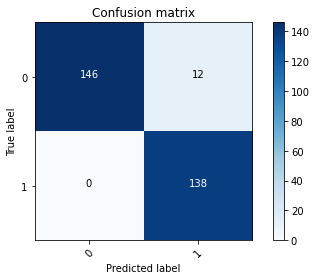

In [47]:
plot_confusion_matrix(confusion_matrix(predictions.round(), y_test),
                     classes=[0,1])

In [48]:
%%bash
pip install -U imbalanced-learn

In [117]:
pip install delayed

     |████████████████████████████████| 72 kB 560 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [49]:
from imblearn.over_sampling import SMOTE

In [51]:
X_resampled, y_resampled =  SMOTE().fit_sample(X,y)

AttributeError: 'SMOTE' object has no attribute 'fit_sample'